In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaf-end/cf45_050.bmp
/kaggle/input/kaf-end/bj06_004.bmp
/kaggle/input/kaf-end/de42_045.bmp
/kaggle/input/kaf-end/94.png
/kaggle/input/kaf-end/di99_045.bmp
/kaggle/input/kaf-end/cq17_037.bmp
/kaggle/input/kaf-end/ce44_034.bmp
/kaggle/input/kaf-end/bf04_056.bmp
/kaggle/input/kaf-end/48.png
/kaggle/input/kaf-end/bf50_009.bmp
/kaggle/input/kaf-end/ce00_044.bmp
/kaggle/input/kaf-end/di25_022.bmp
/kaggle/input/kaf-end/61.png
/kaggle/input/kaf-end/cq56_033.bmp
/kaggle/input/kaf-end/ci73_056.bmp
/kaggle/input/kaf-end/37.png
/kaggle/input/kaf-end/df69_039.bmp
/kaggle/input/kaf-end/148.png
/kaggle/input/kaf-end/de34_005.bmp
/kaggle/input/kaf-end/cj14_101.bmp
/kaggle/input/kaf-end/35.png
/kaggle/input/kaf-end/cq56_052.bmp
/kaggle/input/kaf-end/ci95_037.bmp
/kaggle/input/kaf-end/142.png
/kaggle/input/kaf-end/bq33_053.bmp
/kaggle/input/kaf-end/104.png
/kaggle/input/kaf-end/133.png
/kaggle/input/kaf-end/70.png
/kaggle/input/kaf-end/162.png
/kaggle/input/kaf-end/bj22_018.bmp
/kaggle/inp

# **DATA Preprocessing**

In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

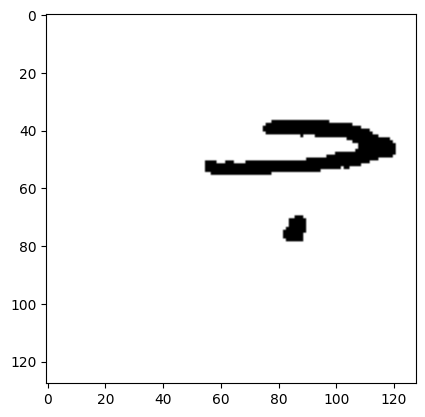

In [3]:
# Read the image
img = mpimg.imread("/kaggle/input/jeem-beg/be06_014.bmp")
# Display the image
imgplot = plt.imshow(img)
plt.show()

In [4]:
import os
directories=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    directories.append(dirname)
directories=directories[1:]
len(set(directories))

56

In [5]:
# List to store the numpy arrays
# Labels
y=[]
# all images array
all_images_arrays=[]
k=0
for i,directory in enumerate(directories):
    image_arrays = []
    # Iterate through the directory
    for filename in os.listdir(directory):
        
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".bmp") or filename.endswith(".jpeg"):  # Change this line to check for '.jpg' files
            # Open the image
            img = Image.open(os.path.join(directory, filename)).convert('RGB') 
            
            # Resize the image to a consistent shape (if needed)
            if img.size != (128, 128):
                img = img.resize((128, 128))

            # Convert the image to a numpy array
            img_array = np.array(img)

            # Check if the image is already 3-channel
            if len(img_array.shape) == 2:
                # Convert to 3-channel by stacking the same image 3 times
                img_array = np.stack((img_array,)*3, axis=-1)

            # Append the array to the list
            image_arrays.append(img_array)

    # Convert the list of arrays to a single numpy array
    if(len(image_arrays)>=100):
        all_images_array = np.array(image_arrays)
        all_images_arrays.append(all_images_array)
        for j in range(len(image_arrays)):
            y.append(k)
        k=k+1
    else : print(len(image_arrays))
    
    
# Concatenate all images
final_array = np.concatenate(all_images_arrays, axis=0)
print("Shape of the array containing all images:", final_array.shape)
y=np.array(y)
y.shape

Shape of the array containing all images: (20634, 128, 128, 3)


(20634,)

In [7]:
len(set(y))

56

# **Hot Encoded**

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y, num_classes=len(set(y)))

2024-06-03 20:01:41.220614: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 20:01:41.220745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 20:01:41.338177: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
y_train_encoded.shape

(20634, 56)

# **Splitting DATA to Train and test**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_array, y_train_encoded, test_size=0.2, random_state=42, stratify=y_train_encoded)

In [11]:
X_train.shape,y_train.shape

((16507, 128, 128, 3), (16507, 56))

# **TRANSFER LEARNING**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import MaxPooling2D, Conv2D  # Import other layers as needed
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [13]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101, ResNet152
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.applications import ResNet152V2

# **Classification Model**

In [15]:
def MyModel(base_model,FineTune=False):
    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = FineTune
    # Create a new model on top
    model = Sequential()

    # Add the base model
    model.add(base_model)

    # Add a global spatial average pooling layer
    model.add(GlobalAveragePooling2D())
    # Add dropout and L2 regularization to the dense layer
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(len(set(y)), activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    
    return model

In [18]:
def trainning(model,data_gen=None):
    # Reduce learning rate when a metric has stopped improving
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                     patience=4, 
                                     verbose=2, 
                                     factor=.75)
    early_stopping = EarlyStopping(monitor='accuracy', 
                                   patience=4, 
                                   restore_best_weights=True)
    if data_gen:
        model.fit(data_gen.flow(X_train, y_train, batch_size=128), callbacks=[early_stopping,lr_reduction],validation_data = (X_test, y_test),epochs=10)
    else : model.fit(X_train, y_train, epochs=10, batch_size=128,callbacks=[early_stopping,lr_reduction],validation_data = (X_test, y_test))

# **VGG16**

In [19]:
# Transfer Learning with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


2024-06-03 20:03:32.262351: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16384: 3.93561, expected 3.22956
2024-06-03 20:03:32.262404: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16388: 5.00229, expected 4.29625
2024-06-03 20:03:32.262422: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16389: 5.12223, expected 4.41618
2024-06-03 20:03:32.262439: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16390: 5.81952, expected 5.11348
2024-06-03 20:03:32.262450: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16391: 5.0187, expected 4.31266
2024-06-03 20:03:32.262461: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16392: 4.36233, expected 3.65629
2024-06-03 20:03:32.262473: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16393: 4.45722, expected 3.75117
2024-06-03 20:03:32.262485: 

  2/129 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - AUC: 0.4735 - Precision: 0.0167 - Recall: 0.4727 - accuracy: 0.0176 - loss: 80.2187 

I0000 00:00:1717445034.660347     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - AUC: 0.7384 - Precision: 0.0297 - Recall: 0.8646 - accuracy: 0.1836 - loss: 24.1957

2024-06-03 20:04:06.666790: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16384: 3.79746, expected 3.02232
2024-06-03 20:04:06.666861: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16385: 6.16164, expected 5.3865
2024-06-03 20:04:06.666871: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16386: 5.85637, expected 5.08124
2024-06-03 20:04:06.666879: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16387: 5.40962, expected 4.63449
2024-06-03 20:04:06.666888: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16388: 4.88737, expected 4.11224
2024-06-03 20:04:06.666896: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16389: 4.88067, expected 4.10554
2024-06-03 20:04:06.666904: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16390: 4.6748, expected 3.89966
2024-06-03 20:04:06.666912: E

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - AUC: 0.7390 - Precision: 0.0297 - Recall: 0.8651 - accuracy: 0.1847 - loss: 24.1040

2024-06-03 20:04:30.073806: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.68707, expected 3.16814
2024-06-03 20:04:30.073870: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 4.0325, expected 3.51357
2024-06-03 20:04:30.073881: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 3.25621, expected 2.73728
2024-06-03 20:04:30.073889: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 3.46832, expected 2.94938
2024-06-03 20:04:30.073898: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 33: 4.14562, expected 3.62669
2024-06-03 20:04:30.073906: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43: 3.31596, expected 2.79702
2024-06-03 20:04:30.073914: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44: 3.67534, expected 3.15641
2024-06-03 20:04:30.073922: E external/local_xla/xla/

129/129 ━━━━━━━━━━━━━━━━━━━━ 69s 324ms/step - AUC: 0.7396 - Precision: 0.0298 - Recall: 0.8657 - accuracy: 0.1858 - loss: 24.0138 - val_AUC: 0.9208 - val_Precision: 0.0373 - val_Recall: 0.9794 - val_accuracy: 0.5968 - val_loss: 5.1489 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - AUC: 0.9105 - Precision: 0.0371 - Recall: 0.9840 - accuracy: 0.5571 - loss: 4.9944 - val_AUC: 0.9426 - val_Precision: 0.0415 - val_Recall: 0.9889 - val_accuracy: 0.6983 - val_loss: 3.7169 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - AUC: 0.9324 - Precision: 0.0406 - Recall: 0.9911 - accuracy: 0.6672 - loss: 3.5924 - val_AUC: 0.9486 - val_Precision: 0.0431 - val_Recall: 0.9937 - val_accuracy: 0.7412 - val_loss: 2.9434 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - AUC: 0.9392 - Precision: 0.0420 - Recall: 0.9966 - accuracy: 0.7129 - loss: 2.7688 - val_AUC: 0.9487 - val_Precision: 0.0454 - val_Recall: 0.9952 - v

# **VGG19**

In [98]:
# Transfer Learning with VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - AUC: 0.7910 - Precision: 0.0332 - Recall: 0.8951 - accuracy: 0.2565 - loss: 18.1463 - val_AUC: 0.9411 - val_Precision: 0.0415 - val_Recall: 0.9896 - val_accuracy: 0.6399 - val_loss: 3.8781 - learning_rate: 0.0010
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 0.9241 - Precision: 0.0421 - Recall: 0.9870 - accuracy: 0.5736 - loss: 3.7652 - val_AUC: 0.9480 - val_Precision: 0.0456 - val_Recall: 0.9964 - val_accuracy: 0.7100 - val_loss: 2.5799 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 0.9310 - Precision: 0.0440 - Recall: 0.9926 - accuracy: 0.6147 - loss: 2.6086 - val_AUC: 0.9499 - val_Precision: 0.0498 - val_Recall: 0.9961 - val_accuracy: 0.7226 - val_loss: 1.9601 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 0.9345 - Precision: 0.0468 - Recall: 0.9946 - accuracy: 0.6391 - loss: 2.0798 - val

# **InceptionV3**

In [99]:
# Transfer Learning with InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 56s 74ms/step - AUC: 0.5331 - Precision: 0.0194 - Recall: 0.6903 - accuracy: 0.0222 - loss: 34.0324 - val_AUC: 0.5445 - val_Precision: 0.0196 - val_Recall: 0.8997 - val_accuracy: 0.0230 - val_loss: 7.9020 - learning_rate: 0.0010
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - AUC: 0.5424 - Precision: 0.0195 - Recall: 0.8934 - accuracy: 0.0219 - loss: 7.4520 - val_AUC: 0.5454 - val_Precision: 0.0196 - val_Recall: 0.8997 - val_accuracy: 0.0233 - val_loss: 6.3602 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - AUC: 0.5418 - Precision: 0.0196 - Recall: 0.8983 - accuracy: 0.0229 - loss: 6.1565 - val_AUC: 0.5456 - val_Precision: 0.0196 - val_Recall: 0.8997 - val_accuracy: 0.0230 - val_loss: 5.5351 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - AUC: 0.5365 - Precision: 0.0195 - Recall: 0.8950 - accuracy: 0.0216 - loss: 5.5800 - val

# **ResNet50**

In [100]:
# Transfer Learning with ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - AUC: 0.8875 - Precision: 0.0546 - Recall: 0.8848 - accuracy: 0.3925 - loss: 4.8120 - val_AUC: 0.9778 - val_Precision: 0.1091 - val_Recall: 0.9736 - val_accuracy: 0.6680 - val_loss: 1.6390 - learning_rate: 0.0010
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - AUC: 0.9751 - Precision: 0.1025 - Recall: 0.9722 - accuracy: 0.6412 - loss: 1.6807 - val_AUC: 0.9816 - val_Precision: 0.1281 - val_Recall: 0.9738 - val_accuracy: 0.7306 - val_loss: 1.3623 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - AUC: 0.9777 - Precision: 0.1124 - Recall: 0.9736 - accuracy: 0.6692 - loss: 1.4918 - val_AUC: 0.9818 - val_Precision: 0.1264 - val_Recall: 0.9770 - val_accuracy: 0.7272 - val_loss: 1.2966 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - AUC: 0.9772 - Precision: 0.1217 - Recall: 0.9692 - accuracy: 0.6873 - loss: 1.4281 - val_

# **DenseNet121**

In [101]:
# Transfer Learning with DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 84s 105ms/step - AUC: 0.7201 - Precision: 0.0306 - Recall: 0.7695 - accuracy: 0.1352 - loss: 10.0947 - val_AUC: 0.9281 - val_Precision: 0.0507 - val_Recall: 0.9755 - val_accuracy: 0.4328 - val_loss: 2.9593 - learning_rate: 0.0010
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 0.9029 - Precision: 0.0490 - Recall: 0.9439 - accuracy: 0.3324 - loss: 3.1355 - val_AUC: 0.9484 - val_Precision: 0.0566 - val_Recall: 0.9816 - val_accuracy: 0.5195 - val_loss: 2.1906 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 0.9192 - Precision: 0.0531 - Recall: 0.9615 - accuracy: 0.3853 - loss: 2.5595 - val_AUC: 0.9535 - val_Precision: 0.0614 - val_Recall: 0.9852 - val_accuracy: 0.5537 - val_loss: 1.8709 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 0.9250 - Precision: 0.0547 - Recall: 0.9686 - accuracy: 0.4100 - loss: 2.2826 - va

# **DenseNet169**

In [102]:
# Transfer Learning with DenseNet169
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model))

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 115s 154ms/step - AUC: 0.6721 - Precision: 0.0273 - Recall: 0.7319 - accuracy: 0.0939 - loss: 11.6740 - val_AUC: 0.8527 - val_Precision: 0.0423 - val_Recall: 0.8907 - val_accuracy: 0.2064 - val_loss: 3.7926 - learning_rate: 0.0010
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - AUC: 0.8381 - Precision: 0.0395 - Recall: 0.8932 - accuracy: 0.1970 - loss: 3.7442 - val_AUC: 0.9117 - val_Precision: 0.0485 - val_Recall: 0.9690 - val_accuracy: 0.3475 - val_loss: 2.8063 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - AUC: 0.8691 - Precision: 0.0424 - Recall: 0.9343 - accuracy: 0.2356 - loss: 3.1197 - val_AUC: 0.9300 - val_Precision: 0.0488 - val_Recall: 0.9867 - val_accuracy: 0.4206 - val_loss: 2.3349 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - AUC: 0.8810 - Precision: 0.0439 - Recall: 0.9444 - accuracy: 0.2684 - loss: 2.8312 - v

# **DenseNet201**

In [17]:
# Transfer Learning with DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model))

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
  2/516 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - AUC: 0.5530 - Precision: 0.0217 - Recall: 0.6094 - accuracy: 0.0234 - loss: 59.1143   

I0000 00:00:1714765484.837146     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


516/516 ━━━━━━━━━━━━━━━━━━━━ 142s 179ms/step - AUC: 0.7091 - Precision: 0.0301 - Recall: 0.7437 - accuracy: 0.1362 - loss: 10.4046 - val_AUC: 0.9089 - val_Precision: 0.0529 - val_Recall: 0.9353 - val_accuracy: 0.3756 - val_loss: 3.0851 - learning_rate: 0.0010
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - AUC: 0.8871 - Precision: 0.0475 - Recall: 0.9163 - accuracy: 0.2914 - loss: 3.1859 - val_AUC: 0.9407 - val_Precision: 0.0553 - val_Recall: 0.9876 - val_accuracy: 0.4790 - val_loss: 2.2531 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - AUC: 0.9018 - Precision: 0.0491 - Recall: 0.9491 - accuracy: 0.3210 - loss: 2.7225 - val_AUC: 0.9480 - val_Precision: 0.0565 - val_Recall: 0.9859 - val_accuracy: 0.4878 - val_loss: 2.0080 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - AUC: 0.9151 - Precision: 0.0518 - Recall: 0.9624 - accuracy: 0.3588 - loss: 2.3561 - val_AUC: 0.9520 - val_Precision: 0.0583 - val_Recall: 0.9913 - 

# **ResNet101**

In [95]:
# Transfer Learning with ResNet101
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model))

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - AUC: 0.8920 - Precision: 0.0686 - Recall: 0.8562 - accuracy: 0.3810 - loss: 4.8966 - val_AUC: 0.9772 - val_Precision: 0.1271 - val_Recall: 0.9670 - val_accuracy: 0.6949 - val_loss: 1.6975 - learning_rate: 0.0010
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 0.9716 - Precision: 0.1272 - Recall: 0.9455 - accuracy: 0.6280 - loss: 1.8201 - val_AUC: 0.9770 - val_Precision: 0.1730 - val_Recall: 0.9353 - val_accuracy: 0.6683 - val_loss: 1.6034 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 0.9741 - Precision: 0.1441 - Recall: 0.9432 - accuracy: 0.6500 - loss: 1.6375 - val_AUC: 0.9783 - val_Precision: 0.1489 - val_Recall: 0.9566 - val_accuracy: 0.6877 - val_loss: 1.5178 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 0.9751 - Precision: 0.1447 - Recall: 0.9482 - accuracy: 0.6634 - loss: 1.5685 - val_AUC: 0.9782 - val_Precision: 0.1597 - val_Recall: 0

# **ResNet152**

In [93]:
# Transfer Learning with ResNet152
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model))

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 87s 110ms/step - AUC: 0.8956 - Precision: 0.0654 - Recall: 0.8715 - accuracy: 0.4069 - loss: 5.5706 - val_AUC: 0.9814 - val_Precision: 0.1134 - val_Recall: 0.9784 - val_accuracy: 0.7104 - val_loss: 1.6703 - learning_rate: 0.0010
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - AUC: 0.9749 - Precision: 0.1053 - Recall: 0.9693 - accuracy: 0.6461 - loss: 1.7708 - val_AUC: 0.9818 - val_Precision: 0.1304 - val_Recall: 0.9704 - val_accuracy: 0.7204 - val_loss: 1.4080 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 33s 65ms/step - AUC: 0.9774 - Precision: 0.1167 - Recall: 0.9700 - accuracy: 0.6764 - loss: 1.5116 - val_AUC: 0.9841 - val_Precision: 0.1359 - val_Recall: 0.9770 - val_accuracy: 0.7654 - val_loss: 1.2322 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - AUC: 0.9778 - Precision: 0.1207 - Recall: 0.9715 - accuracy: 0.6855 - loss: 1.4366 - val_AUC: 0.9833 - val_Precision: 0.1393 - val_Recall: 

# **Building own Model**

In [27]:
def CNN_back_model(activation = 'softmax', 
              loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy', 'Precision', 'Recall', 'AUC']):
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3),
                     activation = 'relu',
                     input_shape = (128, 128, 3)))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Conv2D(128, (4, 4), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(56, activation = activation))
    
    # Compile the model
    model.compile(loss = loss,
                  optimizer = optimizer, 
                  metrics = metrics)
    
    return model

In [28]:
# Init CNN model
background_model = CNN_back_model()

# Reduce learning rate when a metric has stopped improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                 patience=10, 
                                 verbose=2, 
                                 factor=.75)

# If score doesn't improve during patience=20 epochs, stop learning
estopping = EarlyStopping(monitor='val_loss', 
                          patience=20, 
                          verbose=2)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [40]:
# Training
history_background = background_model.fit(X_train, y_train,
                                          batch_size = 128,
                                          epochs = 26,
                                          verbose = 1,
                                          validation_data = (X_test, y_test),
                                          callbacks = [lr_reduction, estopping])

Epoch 1/26
129/129 ━━━━━━━━━━━━━━━━━━━━ 31s 195ms/step - AUC: 0.6359 - Precision: 0.1588 - Recall: 0.0265 - accuracy: 0.1022 - loss: 509.5505 - learning_rate: 0.0010
Epoch 2/26
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - AUC: 0.8994 - Precision: 0.6929 - Recall: 0.2176 - accuracy: 0.3872 - loss: 2.4441 - learning_rate: 0.0010
Epoch 3/26
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - AUC: 0.9452 - Precision: 0.7501 - Recall: 0.3945 - accuracy: 0.5303 - loss: 1.7995 - learning_rate: 0.0010
Epoch 4/26
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - AUC: 0.9669 - Precision: 0.8002 - Recall: 0.5309 - accuracy: 0.6389 - loss: 1.3540 - learning_rate: 0.0010
Epoch 5/26
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - AUC: 0.9794 - Precision: 0.8317 - Recall: 0.6182 - accuracy: 0.7115 - loss: 1.0467 - learning_rate: 0.0010
Epoch 6/26
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - AUC: 0.9831 - Precision: 0.8529 - Recall: 0.6930 - accuracy: 0.7651 - loss: 0.8549 - learning_rate: 0.0010
Epoch 7/26
129

# **Data Augmentation**

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with augmentation options
data_gen = ImageDataGenerator(
    rotation_range=10,
)
# Use the generator during model training

In [51]:
# Transfer Learning with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model),data_gen)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-06-03 16:57:36.227684: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.34782, expected 3.51669
2024-06-03 16:57:36.227764: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.71977, expected 5.88864
2024-06-03 16:57:36.227782: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.95696, expected 6.12583
2024-06-03 16:57:36.227802: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.48105, expected 5.64992
2024-06-03 16:57:36.227815: E external/local_xla/xla/service/gpu/buffer_comparator.cc:11

  3/516 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - AUC: 0.5224 - Precision: 0.0205 - Recall: 0.4931 - accuracy: 0.0191 - loss: 61.2569   

I0000 00:00:1717433863.944745     134 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


128/516 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - AUC: 0.6998 - Precision: 0.0299 - Recall: 0.7832 - accuracy: 0.1093 - loss: 28.1586

2024-06-03 16:57:58.405671: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49152: 2.86797, expected 2.42041
2024-06-03 16:57:58.405732: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49159: 3.22272, expected 2.77516
2024-06-03 16:57:58.405743: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49183: 3.19824, expected 2.75068
2024-06-03 16:57:58.405762: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49195: 3.35146, expected 2.9039
2024-06-03 16:57:58.405772: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49196: 2.97994, expected 2.53238
2024-06-03 16:57:58.405781: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49205: 3.01476, expected 2.5672
2024-06-03 16:57:58.405790: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49209: 3.42369, expected 2.97613
2024-06-03 16:57:58.405799: E

515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - AUC: 0.7984 - Precision: 0.0347 - Recall: 0.8847 - accuracy: 0.2762 - loss: 15.0274

2024-06-03 16:58:50.394224: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.68707, expected 3.16814
2024-06-03 16:58:50.394284: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 4.0325, expected 3.51357
2024-06-03 16:58:50.394299: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 3.25621, expected 2.73728
2024-06-03 16:58:50.394316: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 3.46832, expected 2.94938
2024-06-03 16:58:50.394330: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 33: 4.14562, expected 3.62669
2024-06-03 16:58:50.394340: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43: 3.31596, expected 2.79702
2024-06-03 16:58:50.394351: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44: 3.67534, expected 3.15641
2024-06-03 16:58:50.394362: E external/local_xla/xla/

516/516 ━━━━━━━━━━━━━━━━━━━━ 85s 141ms/step - AUC: 0.7987 - Precision: 0.0347 - Recall: 0.8849 - accuracy: 0.2767 - loss: 15.0002 - val_AUC: 0.9424 - val_Precision: 0.0443 - val_Recall: 0.9874 - val_accuracy: 0.6506 - val_loss: 3.7025 - learning_rate: 0.0010
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 58s 111ms/step - AUC: 0.9345 - Precision: 0.0447 - Recall: 0.9852 - accuracy: 0.6106 - loss: 3.4996 - val_AUC: 0.9528 - val_Precision: 0.0505 - val_Recall: 0.9903 - val_accuracy: 0.6923 - val_loss: 2.5531 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 58s 111ms/step - AUC: 0.9447 - Precision: 0.0489 - Recall: 0.9930 - accuracy: 0.6522 - loss: 2.4821 - val_AUC: 0.9545 - val_Precision: 0.0540 - val_Recall: 0.9954 - val_accuracy: 0.7468 - val_loss: 1.8201 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 58s 111ms/step - AUC: 0.9466 - Precision: 0.0524 - Recall: 0.9932 - accuracy: 0.6798 - loss: 1.9735 - val_AUC: 0.9535 - val_Precision: 0.0570 - val_Recall: 0.9956 

In [24]:
# Transfer Learning with ResNet152
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model),data_gen)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/129 ━━━━━━━━━━━━━━━━━━━━ 1:19:00 37s/step - AUC: 0.4695 - Precision: 0.0168 - Recall: 0.4553 - accuracy: 0.0081 - loss: 14.5964

I0000 00:00:1717435001.335118     385 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


129/129 ━━━━━━━━━━━━━━━━━━━━ 130s 723ms/step - AUC: 0.8569 - Precision: 0.0419 - Recall: 0.8783 - accuracy: 0.3601 - loss: 7.3380 - val_AUC: 0.9777 - val_Precision: 0.0715 - val_Recall: 0.9867 - val_accuracy: 0.6814 - val_loss: 2.2752 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 63s 463ms/step - AUC: 0.9761 - Precision: 0.0705 - Recall: 0.9865 - accuracy: 0.6761 - loss: 2.1087 - val_AUC: 0.9815 - val_Precision: 0.0878 - val_Recall: 0.9867 - val_accuracy: 0.7373 - val_loss: 1.5569 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 62s 453ms/step - AUC: 0.9804 - Precision: 0.0825 - Recall: 0.9886 - accuracy: 0.7193 - loss: 1.5457 - val_AUC: 0.9836 - val_Precision: 0.0952 - val_Recall: 0.9886 - val_accuracy: 0.7478 - val_loss: 1.3213 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 61s 450ms/step - AUC: 0.9827 - Precision: 0.0903 - Recall: 0.9907 - accuracy: 0.7352 - loss: 1.3356 - val_AUC: 0.9844 - val_Precision: 0.1019 - val_Recall: 0.9881 

In [35]:
# Training
history_background = background_model.fit(data_gen.flow(X_train, y_train, batch_size=128),
                                          epochs = 20,
                                          verbose = 1,
                                          validation_data = (X_test, y_test),
                                          callbacks = [lr_reduction, estopping])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-06-03 20:25:55.087276: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.6927, expected 4.97603
2024-06-03 20:25:55.087332: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.58965, expected 4.87297
2024-06-03 20:25:55.087350: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.16616, expected 5.44949
2024-06-03 20:25:55.087367: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 5.7096, expected 4.99293
2024-06-03 20:25:55.087381: E external/local_xla/xla/service/gpu/buffer_comparator.cc:11

 14/129 ━━━━━━━━━━━━━━━━━━━━ 57s 497ms/step - AUC: 0.5022 - Precision: 0.0204 - Recall: 0.0172 - accuracy: 0.0215 - loss: 1552.6426

2024-06-03 20:26:34.868429: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.27263, expected 5.45771
2024-06-03 20:26:34.868484: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.89309, expected 6.07817
2024-06-03 20:26:34.868501: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.9472, expected 6.13228
2024-06-03 20:26:34.868518: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.09031, expected 5.27539
2024-06-03 20:26:34.868532: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.93673, expected 6.12181
2024-06-03 20:26:34.868543: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.37104, expected 5.55612
2024-06-03 20:26:34.868555: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.91271, expected 6.09779
2024-06-03 20:26:34.868566: E external/local_xla/xla/se

129/129 ━━━━━━━━━━━━━━━━━━━━ 135s 740ms/step - AUC: 0.6236 - Precision: 0.1148 - Recall: 0.0161 - accuracy: 0.0885 - loss: 344.4796 - learning_rate: 0.0010
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 69s 506ms/step - AUC: 0.8835 - Precision: 0.6277 - Recall: 0.1372 - accuracy: 0.3291 - loss: 2.6683 - learning_rate: 0.0010
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 70s 509ms/step - AUC: 0.9257 - Precision: 0.6737 - Recall: 0.2558 - accuracy: 0.4255 - loss: 2.1696 - learning_rate: 0.0010
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 69s 507ms/step - AUC: 0.9384 - Precision: 0.7032 - Recall: 0.3059 - accuracy: 0.4710 - loss: 1.9694 - learning_rate: 0.0010
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 69s 505ms/step - AUC: 0.9546 - Precision: 0.7439 - Recall: 0.3932 - accuracy: 0.5448 - loss: 1.6560 - learning_rate: 0.0010
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 69s 504ms/step - AUC: 0.9630 - Precision: 0.7597 - Recall: 0.4469 - accuracy: 0.5870 - loss: 1.4851 - learning_rate: 0.0010
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 69s 505ms/step - AUC: 0.9661 - Precision: 0.7691 - Recall: 0.4859 - accuracy: 0.6122 - loss: 1.3900 - learning_rate: 0.0010
Epoch 8/20
129/129 ━━━━━━━━

# **Fine Tuning Vgg16**

In [20]:
# Transfer Learning with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128,3))
trainning(MyModel(base_model,True))

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 99s 500ms/step - AUC: 0.5187 - Precision: 0.0189 - Recall: 0.6827 - accuracy: 0.0203 - loss: 17.2261 - val_AUC: 0.5422 - val_Precision: 0.0196 - val_Recall: 0.8229 - val_accuracy: 0.0211 - val_loss: 5.8447 - learning_rate: 0.0010
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 261ms/step - AUC: 0.5381 - Precision: 0.0195 - Recall: 0.8116 - accuracy: 0.0233 - loss: 5.6754 - val_AUC: 0.5438 - val_Precision: 0.0196 - val_Recall: 0.8612 - val_accuracy: 0.0211 - val_loss: 5.0813 - learning_rate: 0.0010
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 261ms/step - AUC: 0.5404 - Precision: 0.0196 - Recall: 0.8491 - accuracy: 0.0218 - loss: 4.9753 - val_AUC: 0.5441 - val_Precision: 0.0196 - val_Recall: 0.8805 - val_accuracy: 0.0230 - val_loss: 4.7192 - learning_rate: 0.0010
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 261ms/step - AUC: 0.5392 - Precision: 0.0196 - Recall: 0.8672 - accuracy: 0.0210 - loss: 4.6606 - val_AUC: 0.5442 - val_Precision: 0.0196 - val_Reca

# **VIT (VISION Transformers)**

In [14]:
import torch
from transformers import ViTForImageClassification, ViTConfig, TrainingArguments, Trainer
from datasets import load_dataset
from torchvision import transforms
from transformers import ViTConfig, ViTForImageClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

# Your dataset (x is images, y is labels)
x = final_array 
y = y_train_encoded 

# Define the pre-trained ViT model
model_name = "google/vit-base-patch16-224" 

# Define data augmentation and preprocessing
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Prepare the dataset for training
resized_images = []
for image in x: 
    pil_image = Image.fromarray(image)  # Convert to PIL Image
    resized_image = data_transforms(pil_image) 
    resized_images.append(resized_image)

X_train, X_test, y_train, y_test = train_test_split(resized_images, y_train_encoded, test_size=0.2, random_state=42, stratify=y_train_encoded)

class YourImageDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx] 
        label = self.labels[idx]
        return {"pixel_values": image, "labels": label}

# Create the dataset
dataset_train = YourImageDataset(X_train, y_train)
dataset_eval = YourImageDataset(X_test, y_test) 

# Load the pre-trained ViT model and configuration
num_labels = 56  # Number of classes in your dataset
config = ViTConfig.from_pretrained(model_name, num_labels=num_labels)
model = ViTForImageClassification.from_pretrained(model_name, config=config, ignore_mismatched_sizes=True)

# Freeze the pre-trained encoder (or some layers)
for param in model.vit.encoder.parameters():
    param.requires_grad = False

# Unfreeze the output layer
for param in model.classifier.parameters():
    param.requires_grad = True

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=32,
    learning_rate=2e-5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # Log metrics at each epoch
    load_best_model_at_end=True,  # Load the best model based on validation performance
    metric_for_best_model="accuracy",  # Define the metric to use for selecting the best model
    report_to=["tensorboard"],  # Enable TensorBoard logging
)

# Define a function to compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average="macro")
    recall = recall_score(labels, preds, average="macro")
    f1 = f1_score(labels, preds, average="macro")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

# Create a Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_eval,
    compute_metrics=compute_metrics,  # Pass the compute_metrics function
)

# Start the training process
trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)

# Get the predicted labels and true labels for validation
preds = trainer.predict(dataset_eval)  # Predict on the evaluation dataset
labels = preds.label_ids
predictions = preds.predictions.argmax(-1)

# Ensure both labels and predictions are of the same type
labels = labels.flatten()
predictions = predictions.flatten()

# Calculate metrics on the validation set
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average="macro")
recall = recall_score(labels, predictions, average="macro")
f1 = f1_score(labels, predictions, average="macro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([56]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([56, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seeda

Epoch,Training Loss,Validation Loss


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets